<a href="https://colab.research.google.com/github/moch1996/MachineLearningProj/blob/master/assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [3]:
# import data with numpy
data_train = np.genfromtxt('training.txt', delimiter=',')
data_test = np.genfromtxt('testing.txt', delimiter=',')

In [4]:
data_train[0,0] = 7.609000000000000208e-01
data_test[0,0] = 1.007260000000000044e+00

In [5]:
# number of training data
n_train = data_train.shape[0]
n_test = data_test.shape[0]

In [6]:
# training data
x1_train          = data_train[:,0] # feature1
x2_train          = data_train[:,1] # feature2
y_train           = data_train[:,2][:,None] # label
idx_class0_train  = (data_train[:,2]==0) # index of class 0
idx_class1_train  = (data_train[:,2]==1) # index of class 1

In [7]:
# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
y_test              = data_test[:,2][:,None] # label
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

In [8]:
# Set the theta
init_theta = np.zeros((10,10))
for i in range(10) :
  for j in range(10) :
    init_theta[j,i] = random.uniform(1e-1,2e-1)

init_theta

array([[0.1005016 , 0.16777743, 0.12763204, 0.11171115, 0.16260112,
        0.13551533, 0.17433637, 0.11161251, 0.12499841, 0.15671668],
       [0.12602045, 0.1176323 , 0.12415189, 0.17401995, 0.14182112,
        0.17087247, 0.1104303 , 0.15641777, 0.13458624, 0.17195426],
       [0.11779139, 0.19111121, 0.1410193 , 0.14557695, 0.18284408,
        0.14689089, 0.19221347, 0.11647484, 0.19567077, 0.15545913],
       [0.14304398, 0.1425206 , 0.10309195, 0.19302417, 0.10130214,
        0.13328659, 0.15858645, 0.13603378, 0.10513533, 0.1662623 ],
       [0.16443196, 0.16513641, 0.16356624, 0.15027326, 0.16491471,
        0.14049584, 0.17793416, 0.15913297, 0.1713673 , 0.17452693],
       [0.14406874, 0.14423178, 0.15107083, 0.15035004, 0.1773603 ,
        0.16662928, 0.11690628, 0.11980643, 0.1773684 , 0.11462706],
       [0.17434923, 0.18018239, 0.11726746, 0.17081222, 0.15207029,
        0.14858696, 0.18256161, 0.16125029, 0.19024757, 0.14313317],
       [0.10049165, 0.17450888, 0.1106270

In [9]:
theta = init_theta

In [10]:
# sigmoid function
def sigmoid(z) :
  sigmoid_f = 1 / (1+np.exp(-z))
  return sigmoid_f

In [11]:
h_arr = f_pred(x1_train,x2_train,theta)

NameError: ignored

In [12]:
X = np.ones((200,100))

In [13]:
for i in range(10) :
  X[:,i] = (x1_train**i) * (x2_train**0)

In [14]:
for i in range(10,20) :
  X[:,i] = (x1_train**(i-10)) * (x2_train**1)

In [15]:
for i in range(20,30) :
  X[:,i] = (x1_train**(i-20)) * (x2_train**2)

In [16]:
for i in range(30,40) :
  X[:,i] = (x1_train**(i-30)) * (x2_train**3)

In [17]:
for i in range(40,50) :
  X[:,i] = (x1_train**(i-40)) * (x2_train**4)

In [18]:
for i in range(50,60) :
  X[:,i] = (x1_train**(i-50)) * (x2_train**5)

In [19]:
for i in range(60,70) :
  X[:,i] = (x1_train**(i-60)) * (x2_train**6)

In [20]:
for i in range(70,80) :
  X[:,i] = (x1_train**(i-70)) * (x2_train**7)

In [21]:
for i in range(80,90) :
  X[:,i] = (x1_train**(i-80)) * (x2_train**8)

In [22]:
for i in range(90,100) :
  X[:,i] = (x1_train**(i-90)) * (x2_train**9)

In [23]:
X2 = np.ones((200,100))

In [ ]:
k=0
for i in range(10) :
  for j in range(10) :
    X2[:,k] = (x1_test**i) * (x2_test**j)
    print(k)
    k = k+1
X2

In [25]:
X.shape

(200, 100)

In [29]:
theta=init_theta.reshape(100,-1)
theta.shape

(100, 1)

In [30]:
#real
def pls_pred(X,theta) :
  p = sigmoid(np.dot(X,theta))
  return p

In [31]:
prediction = pls_pred(X,theta)

In [32]:
#real
def pls_loss(label, pls_pred):  # cross-entropy error
    
    return np.mean(-label * np.log(pls_pred + 1e-8) - (1-label) * np.log(1 - pls_pred + 1e-8)) 


In [33]:
pls_loss(y_train,prediction)

0.311010035942933

In [34]:
#real
def plsgrad_loss(pls_pred,label, X) :
  n = len(label)
  loss = (2 * np.dot(X.T, pls_pred - label)) / n
  return loss

In [35]:
plsgrad_loss(prediction, y_train, X).shape

(100, 1)

In [36]:
#real training
def grad_desc(X, label , theta_init, tau,lamb,iteration):

    n = len(label)
    loss_history = np.zeros(iteration)
    coef_history = np.zeros((iteration,100))
    theta2 = theta_init # initialization

    for i in range(iteration): # loop over the iterations
        y_pred =  pls_pred(X,theta2)
        grad_f =  plsgrad_loss(y_pred,label,X) # gradient of the loss  
        theta2 = (1- tau*lamb)*theta2 - tau*grad_f # update rule of gradient descent  
        loss_history[i] = pls_loss(label,y_pred) # save the current loss value
        coef_history[i,:] = theta2.T 
        
    return theta2, loss_history, coef_history

In [37]:
#real training test
def grad_desc2(X, label , theta_init, tau,lamb,iteration):

    n = len(label)
    loss_history2 = np.zeros(iteration)
    coef_history2 = np.zeros((iteration,100))
    theta3 = theta_init # initialization

    for i in range(iteration): # loop over the iterations
        y_pred =  pls_pred(X,theta3)
        grad_f =  plsgrad_loss(y_pred,label,X) # gradient of the loss  
        theta3 = (1- tau*lamb)*theta3 - tau*grad_f # update rule of gradient descent  
        loss_history2[i] = pls_loss(label,y_pred) # save the current loss value
        coef_history2[i,:] = theta3.T 
        
    return theta3, loss_history2, coef_history2

In [38]:
# run gradient descent algorithm TRAINING
start = time.time()
w_init = np.zeros(10)[:,None]
tau = 1
iteration = 4000
lamb = 1e-5
theta2, loss_history, coef_history = grad_desc(X, y_train , theta, tau, lamb, iteration)

print('TIME=',time.time()-start)
print(loss_history[-1])
#print(coef_history[-1].reshape(100,1))

TIME= 0.4087667465209961
0.06406149936674434


In [39]:
# run gradient descent algorithm TESTING
start = time.time()
w_init = np.zeros(10)[:,None]
tau = 1
iteration = 4000
lamb = 1e-5
theta3, loss_history2, coef_history2 = grad_desc2(X2, y_test , theta, tau, lamb, iteration)

print('TIME=',time.time()-start)
print(loss_history2[-1])
#print(coef_history2[-1].reshape(100,1))

TIME= 0.42600083351135254
0.03782233111497566


In [ ]:
theta[:5]

array([[0.11577806],
       [0.13673755],
       [0.11620745],
       [0.11504881],
       [0.14641975]])

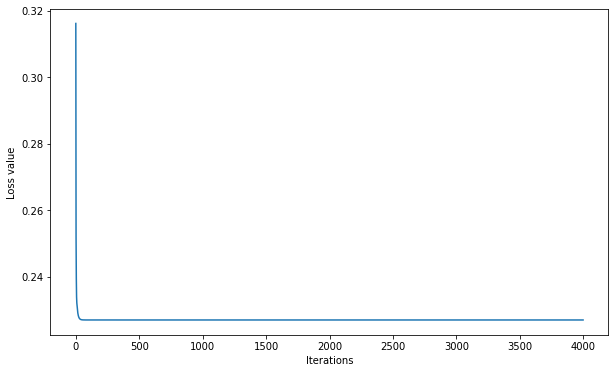

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

In [ ]:
# Set the theta
init_theta = np.zeros((10,10))
for i in range(10) :
  for j in range(10) :
    init_theta[j,i] = random.uniform(1e-1,2e-1)

init_theta

array([[0.11577806, 0.13673755, 0.11620745, 0.11504881, 0.14641975,
        0.17568129, 0.12604608, 0.10832476, 0.12309584, 0.16582497],
       [0.11489435, 0.19678419, 0.17742107, 0.14430922, 0.16160654,
        0.15774797, 0.10779051, 0.18920069, 0.14673045, 0.14125863],
       [0.11138833, 0.14366378, 0.16332828, 0.16876222, 0.1591364 ,
        0.16165535, 0.18007682, 0.12938744, 0.16798243, 0.15652168],
       [0.19716164, 0.16009127, 0.13318581, 0.11170808, 0.19804675,
        0.12114674, 0.10075135, 0.18787659, 0.17499162, 0.19968722],
       [0.11019005, 0.17278639, 0.1142757 , 0.12364748, 0.11158329,
        0.10163056, 0.11819873, 0.1679147 , 0.17731001, 0.18904346],
       [0.1083806 , 0.11506604, 0.11361429, 0.13445826, 0.16612054,
        0.18678548, 0.1890908 , 0.1640649 , 0.19284755, 0.18193967],
       [0.12866825, 0.10545458, 0.17018818, 0.19971857, 0.1367034 ,
        0.18873734, 0.17854228, 0.19958197, 0.14899273, 0.10120165],
       [0.13924044, 0.13020147, 0.1015051

In [ ]:
theta = init_theta.reshape(100,1)

In [40]:
x1_min, x1_max = x1_train.min(), x1_train.max()    # min and max of grade 1
x2_min, x2_max = x2_train.min(), x2_train.max()    # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max), np.linspace(x2_min,x2_max))               # create meshgrid

In [41]:
X_train = np.ones((xx1.shape[0],xx2.shape[0],100))

In [43]:
h=0
for i in range(10) :
  for j in range(10) :
    X_train[:,:,h] = (xx1**j) * (xx2**i)
    
    h = h+1

X_train.shape

(50, 50, 100)

In [44]:
theta_train = coef_history[-1][:,None]

In [45]:
train = pls_pred(X_train,theta_train)
train = train.reshape(xx1.shape)
train.shape

(50, 50)

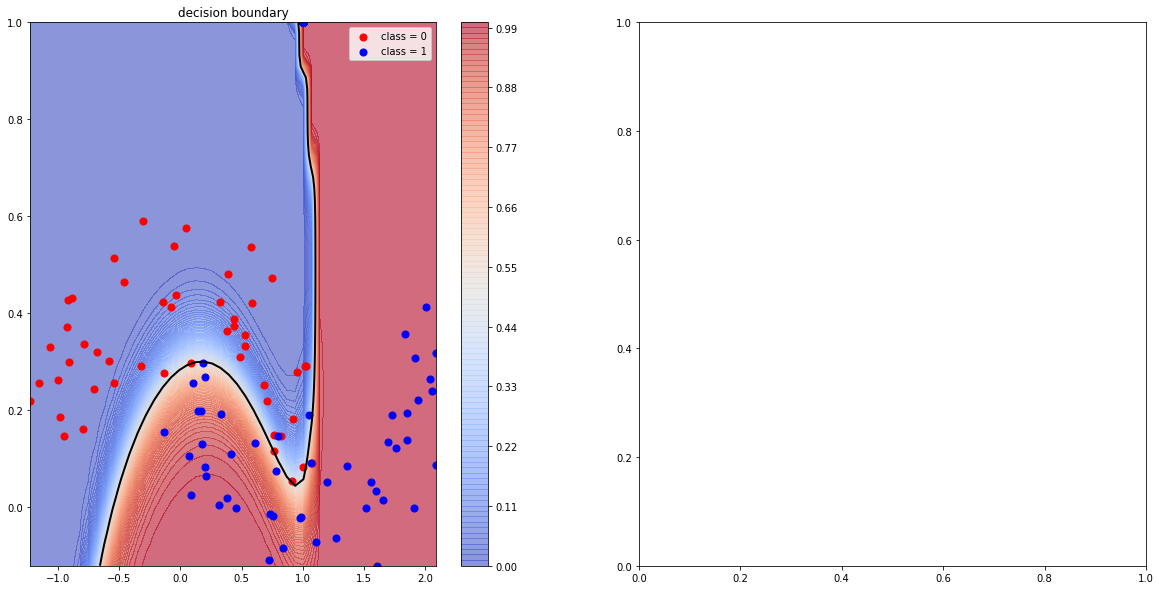

In [55]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

ax = plt.contourf(xx1,xx2,train,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1_train[idx_class0_train],x2_train[idx_class0_train], s=50, c='r', label ='class = 0')
plt.scatter(x1_train[idx_class1_train],x2_train[idx_class1_train], c='blue', s=50, label = 'class = 1')
plt.contour(xx1,xx2, train,levels=[0.5], linewidths=2, colors='k',)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.legend(loc='best')
plt.title('decision boundary')

plt.subplot(1,2,2)
plt.show()

#OUTPUT

1. Plot the training data

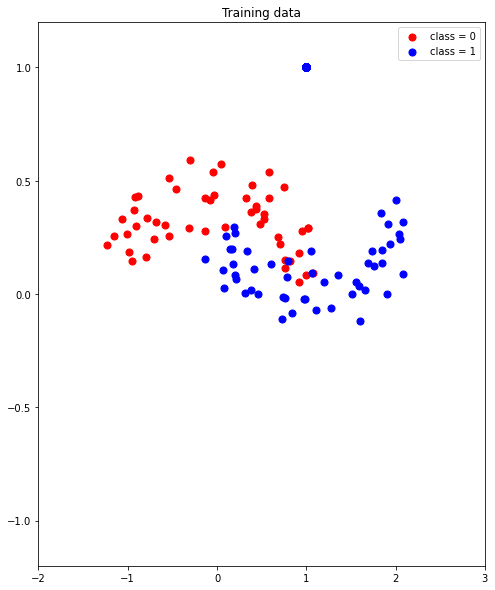

In [ ]:
plt.figure(1,figsize=(8,10))
plt.scatter(x1_train[idx_class0_train],x2_train[idx_class0_train], s=50, c='r', label ='class = 0')
plt.scatter(x1_train[idx_class1_train],x2_train[idx_class1_train], c='blue', s=50, label = 'class = 1')
plt.title('Training data')
plt.legend(loc='best')
plt.xlim(-2,3)
plt.ylim(-1.2,1.2)
plt.show()

2. Plot the test data

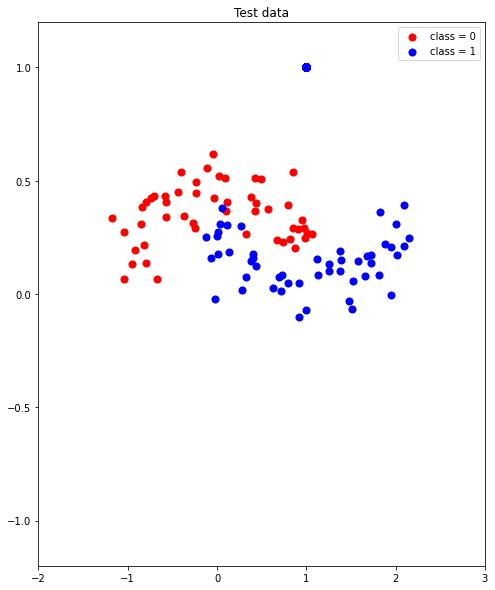

In [ ]:
plt.figure(1,figsize=(8,10))
plt.scatter(x1_test[idx_class0_test],x2_test[idx_class0_test], s=50, c='r', label ='class = 0')
plt.scatter(x1_test[idx_class1_test],x2_test[idx_class1_test], c='blue', s=50, label = 'class = 1')
plt.title('Test data')
plt.legend(loc='best')
plt.xlim(-2,3)
plt.ylim(-1.2,1.2)
plt.show()

3. Plot the  learning curve with λ=0.00001

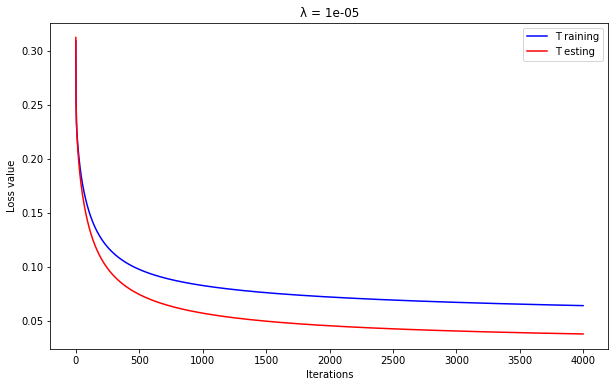

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history, color="blue",label = "T raining")
plt.plot(np.array(range(iteration)), loss_history2, color="red", label = "T esting")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend(loc='best')
plt.title("λ = 1e-05")
plt.show()

4. Plot the  learning curve with λ=0.0001

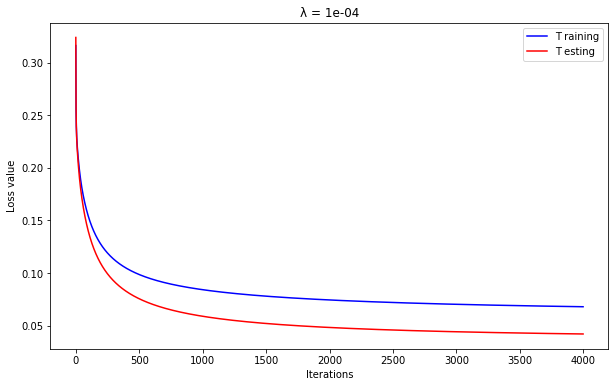

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history, color="blue",label = "T raining")
plt.plot(np.array(range(iteration)), loss_history2, color="red", label = "T esting")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend(loc='best')
plt.title("λ = 1e-04")
plt.show()

5. Plot the  learning curve with λ=0.001

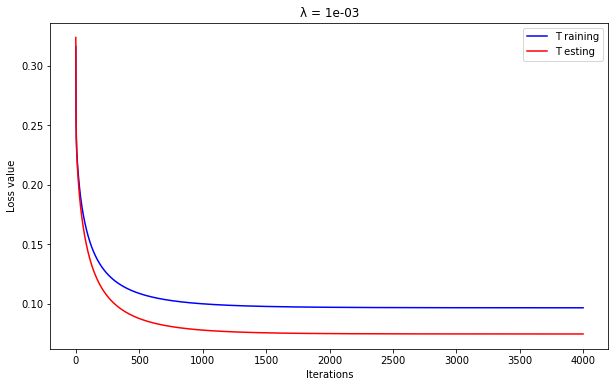

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history, color="blue",label = "T raining")
plt.plot(np.array(range(iteration)), loss_history2, color="red", label = "T esting")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend(loc='best')
plt.title("λ = 1e-03")
plt.show()

6. Plot the  learning curve with λ=0.01

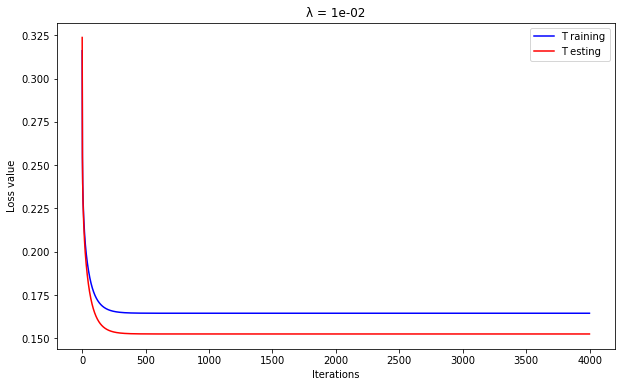

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history, color="blue",label = "T raining")
plt.plot(np.array(range(iteration)), loss_history2, color="red", label = "T esting")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend(loc='best')
plt.title("λ = 1e-02")
plt.show()

7. Plot the  learning curve with λ=0.1

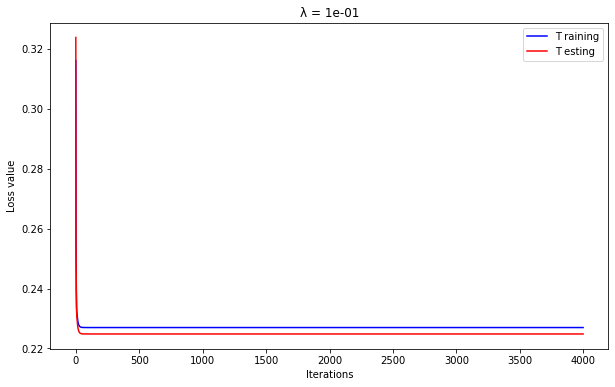

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history, color="blue",label = "T raining")
plt.plot(np.array(range(iteration)), loss_history2, color="red", label = "T esting")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend(loc='best')
plt.title("λ = 1e-01")
plt.show()

8.Plot the probability map of the obtained classifier with λ=0.00001

<function matplotlib.pyplot.show>

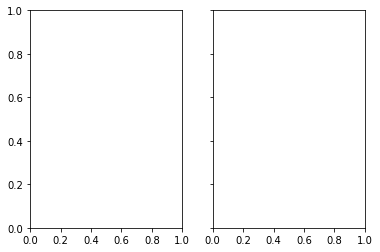

In [ ]:
lt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='Greens', alpha=0.5)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1[idx==0],x2[idx==0], s=25, c='r', label ='class = 0')
plt.scatter(x1[idx==1],x2[idx==1], c='blue', s=25, label = 'class = 1')
plt.contour(xx1,xx2, p,levels=[0.5], linewidths=2, colors='k') 
plt.legend(loc='best')
plt.title('decision boundary(Quadratic)')
plt.show()

NameError: ignored

In [ ]:
plt.contourf?